In [3]:
import  numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
import warnings
import csv
warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_columns',None)

In [4]:
df=pd.read_excel("/content/AirQualityUCI.xlsx")
print(df)

           Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  \
0    2004-03-10  18:00:00     2.6      1360.00       150  11.881723   
1    2004-03-10  19:00:00     2.0      1292.25       112   9.397165   
2    2004-03-10  20:00:00     2.2      1402.00        88   8.997817   
3    2004-03-10  21:00:00     2.2      1375.50        80   9.228796   
4    2004-03-10  22:00:00     1.6      1272.25        51   6.518224   
...         ...       ...     ...          ...       ...        ...   
9352 2005-04-04  10:00:00     3.1      1314.25      -200  13.529605   
9353 2005-04-04  11:00:00     2.4      1162.50      -200  11.355157   
9354 2005-04-04  12:00:00     2.4      1142.00      -200  12.374538   
9355 2005-04-04  13:00:00     2.1      1002.50      -200   9.547187   
9356 2005-04-04  14:00:00     2.2      1070.75      -200  11.932060   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
0           1045.50    166.0       1056.25    113.0       1692.00   
1        

In [5]:
#查看類別特徵有幾個，數值特徵有幾個
all_cols=df.columns.tolist()
categorical=0
numerical=0
for col in all_cols:
    if(df[col].dtype == 'object'):
        categorical+=1
    else:
        numerical+=1
print(categorical)
print(numerical)

1
14


In [6]:
from datetime import datetime
new_df=pd.to_datetime(df['Date'].astype(str)+" "+df['Time'].astype(str))
df.insert(0,'datatime',new_df)

In [7]:
df=df.drop("Date",axis=1)
df=df.drop("Time",axis=1)

In [8]:
df = df.dropna().replace(-200,np.nan)

In [9]:
missing_data=df.isnull().sum()
missing_data[missing_data>0]

CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

In [10]:
df.drop('NMHC(GT)', axis=1, inplace=True) 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9356
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   datatime       9357 non-null   datetime64[ns]
 1   CO(GT)         7674 non-null   float64       
 2   PT08.S1(CO)    8991 non-null   float64       
 3   C6H6(GT)       8991 non-null   float64       
 4   PT08.S2(NMHC)  8991 non-null   float64       
 5   NOx(GT)        7718 non-null   float64       
 6   PT08.S3(NOx)   8991 non-null   float64       
 7   NO2(GT)        7715 non-null   float64       
 8   PT08.S4(NO2)   8991 non-null   float64       
 9   PT08.S5(O3)    8991 non-null   float64       
 10  T              8991 non-null   float64       
 11  RH             8991 non-null   float64       
 12  AH             8991 non-null   float64       
dtypes: datetime64[ns](1), float64(12)
memory usage: 1023.4 KB


In [12]:
#Removing Outliers with the Interquartile Range Method (IQR)

Q1 = df.quantile(0.25) #first 25% of the data
Q3 = df.quantile(0.75) #first 75% of the data
IQR = Q3 - Q1 #IQR = InterQuartile Range

scale = 2 #For Normal Distributions, scale = 1.5
lower_lim = Q1 - scale*IQR
upper_lim = Q3 + scale*IQR

lower_outliers = (df[df.columns[1:13]] < lower_lim)
upper_outliers = (df[df.columns[1:13]] > upper_lim)

In [13]:
#Create new DataFrame without the outliers
num_cols = list(df.columns[1:13])
df_out_IQR = df[~((df[num_cols] < (Q1 - 2 * IQR)) |(df[num_cols] > (Q3 + 2 * IQR))).any(axis=1)]
df_out_IQR.info()
#Removing NOx(GT) and NO2(GT) sensor data due the ammount of null values if compared to other sensors
pd.options.mode.chained_assignment = None
df_out_IQR.drop(['NOx(GT)','NO2(GT)'],axis=1, inplace=True)
df_out_IQR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8900 entries, 0 to 9356
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   datatime       8900 non-null   datetime64[ns]
 1   CO(GT)         7259 non-null   float64       
 2   PT08.S1(CO)    8581 non-null   float64       
 3   C6H6(GT)       8581 non-null   float64       
 4   PT08.S2(NMHC)  8581 non-null   float64       
 5   NOx(GT)        7299 non-null   float64       
 6   PT08.S3(NOx)   8581 non-null   float64       
 7   NO2(GT)        7296 non-null   float64       
 8   PT08.S4(NO2)   8581 non-null   float64       
 9   PT08.S5(O3)    8581 non-null   float64       
 10  T              8581 non-null   float64       
 11  RH             8581 non-null   float64       
 12  AH             8581 non-null   float64       
dtypes: datetime64[ns](1), float64(12)
memory usage: 973.4 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8900 entries, 0 

In [14]:
missing_data=df_out_IQR.isnull().sum()
missing_data[missing_data>0]

CO(GT)           1641
PT08.S1(CO)       319
C6H6(GT)          319
PT08.S2(NMHC)     319
PT08.S3(NOx)      319
PT08.S4(NO2)      319
PT08.S5(O3)       319
T                 319
RH                319
AH                319
dtype: int64

In [15]:
df = df_out_IQR.dropna(axis=0)
df.reset_index(drop=True,inplace=True)
missing_data=df.isnull().sum()
missing_data[missing_data>0]

Series([], dtype: int64)

In [16]:
df.corr()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
CO(GT),1.000000,0.860890,0.920507,0.910267,-0.735999,0.598172,0.834640,0.064590,-0.006596,0.050233
PT08.S1(CO),0.860890,1.000000,0.861980,0.867624,-0.780805,0.641398,0.879990,0.058988,0.120311,0.144285
C6H6(GT),0.920507,0.861980,1.000000,0.986883,-0.759553,0.754667,0.842622,0.259518,-0.101767,0.199272
PT08.S2(NMHC),0.910267,0.867624,0.986883,1.000000,-0.802025,0.757678,0.854544,0.283670,-0.118371,0.208402
PT08.S3(NOx),-0.735999,-0.780805,-0.759553,-0.802025,1.000000,-0.486128,-0.815842,-0.113972,-0.091214,-0.220987
PT08.S4(NO2),0.598172,0.641398,0.754667,0.757678,-0.486128,1.000000,0.540564,0.605461,-0.053323,0.660996
PT08.S5(O3),0.834640,0.879990,0.842622,0.854544,-0.815842,0.540564,1.000000,-0.018942,0.129004,0.079190
T,0.064590,0.058988,0.259518,0.283670,-0.113972,0.605461,-0.018942,1.000000,-0.574760,0.656972
RH,-0.006596,0.120311,-0.101767,-0.118371,-0.091214,-0.053323,0.129004,-0.574760,1.000000,0.171658
AH,0.050233,0.144285,0.199272,0.208402,-0.220987,0.660996,0.079190,0.656972,0.171658,1.000000


In [17]:
# sns.pairplot(df)
# plt.show()

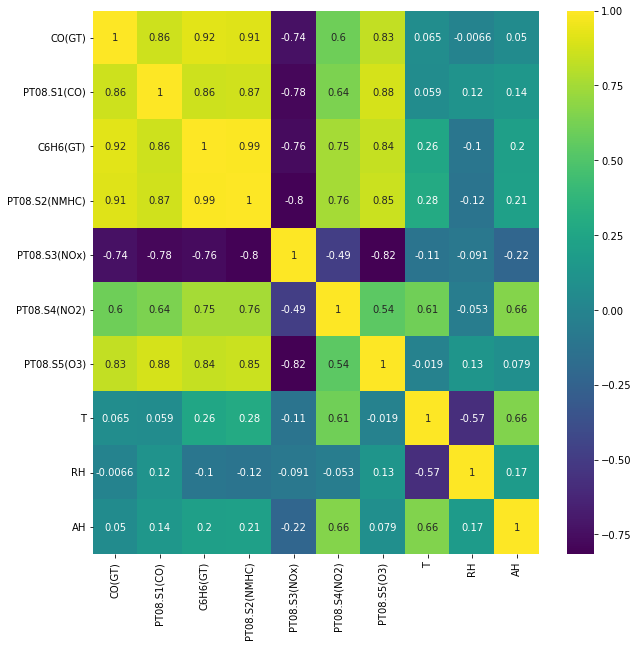

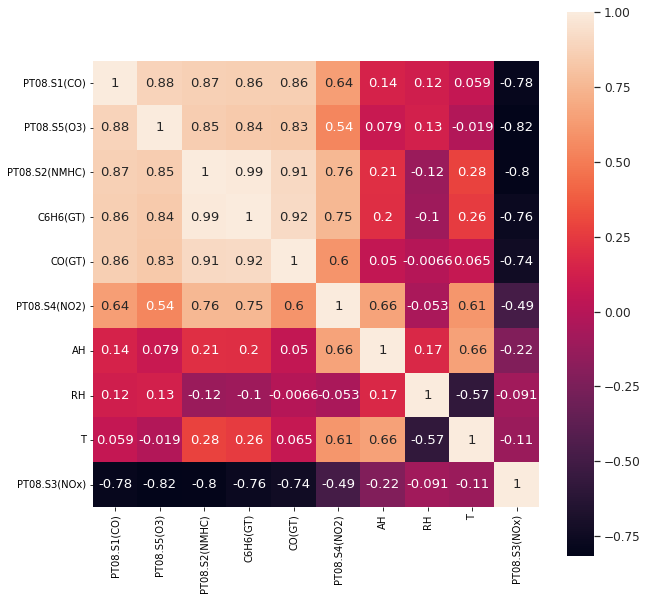

In [18]:
corrmat=df.corr()
top_corr_feature=corrmat.index
plt.figure(figsize=(10,10))
# to plot heat map
g=sns.heatmap(df[top_corr_feature].corr(),annot=True,cmap='viridis')

y=df[['PT08.S1(CO)']]
# 
train = df.iloc[:len(y),:]
cols = train .corr().nlargest(10,'PT08.S1(CO)').index
plt.subplots(figsize=(10,10))
sns.set(font_scale=1.1)
sns.heatmap(train[cols].corr(),square=True, annot=True)

In [19]:
df.drop('datatime',axis=1,inplace=True)
df.drop(['PT08.S1(CO)'],axis=1, inplace=True)

In [20]:
from sklearn.model_selection import train_test_split
df_train, df_test, y_train, y_test = train_test_split(df, y, test_size=0.3,random_state = 10)  

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(df_train)
df_train_std= sc.transform(df_train)
df_test_std = sc.transform(df_test)

In [22]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error
from math import sqrt
lr = LinearRegression()
lr.fit(df_train_std,y_train)
lr.score(df_test_std,y_test)
y_pred = lr.predict(df_test_std)
print(y_pred)
# The coefficients
print('Coefficients: \n',lr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
print('Mean absolute error: %.2f'
      % mean_absolute_error(y_test, y_pred))
print('Mean absolute percentange error: %.2f'
      % mean_absolute_percentage_error(y_test, y_pred))
print('Root Mean squared error: %.2f'
      % sqrt(mean_squared_error(y_test, y_pred)))
print('R squared value: %.2f'%r2_score(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
# the r squared value
scores = cross_val_score(lr, df_train_std, y_train, scoring='r2', cv=10).mean()#cross_val_score這是驗證用來評分資料準確度的。
scores

[[1229.59323106]
 [1008.8785394 ]
 [1129.27568051]
 ...
 [1086.54880897]
 [1083.90930423]
 [ 934.0789802 ]]
Coefficients: 
 [[ 54.38315892  19.90643372 -46.34559536 -48.83504616  82.76212191
   65.54531959   8.15170954  24.64588956 -48.65140252]]
Mean squared error: 5396.48
Mean absolute error: 56.10
Mean absolute percentange error: 0.05
Root Mean squared error: 73.46
R squared value: 0.87
Coefficient of determination: 0.87


0.8603150377827419

RMSE value for k=  2 is: 56.69244171805286
RMSE value for k=  3 is: 55.142207308817156
RMSE value for k=  4 is: 54.611591728194085
RMSE value for k=  5 is: 54.89913506051177
RMSE value for k=  6 is: 54.974999064251286
RMSE value for k=  7 is: 55.0831079320987
RMSE value for k=  8 is: 55.73854038436135
RMSE value for k=  9 is: 56.43698525067263
RMSE value for k=  10 is: 56.840621271898186
RMSE value for k=  11 is: 56.84947622136756
RMSE value for k=  12 is: 57.136622730738154
RMSE value for k=  13 is: 57.55958562835235
RMSE value for k=  14 is: 57.69564478424433
RMSE value for k=  15 is: 57.86548765019798
RMSE value for k=  16 is: 58.06943831992805
RMSE value for k=  17 is: 58.19937180964821
RMSE value for k=  18 is: 58.39080300069909
RMSE value for k=  19 is: 58.84172445894293
RMSE value for k=  20 is: 58.94176209936461
RMSE value for k=  21 is: 59.146272774552294
RMSE value for k=  22 is: 59.341928619859445
RMSE value for k=  23 is: 59.496723306044046
RMSE value for k=  24 is: 59.6716

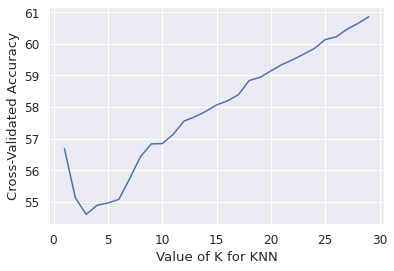

In [23]:
from sklearn.neighbors import KNeighborsRegressor
k_scores = []#to store rmse values for different k
k_range = range(1,30)
for K in range(1,30):
    K = K+1
    model =KNeighborsRegressor(n_neighbors = K)
    model.fit(df_train_std, y_train)  #fit the model
    pred=model.predict(df_test_std) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    k_scores.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)
plt.plot(k_range,k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [24]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9,10,15,20,25,30]}

knn = KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=10)
model=model.fit(df_train_std,y_train)
model.best_params_
y_pred = model.predict(df_test_std)
print(model.best_score_)
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
print('Mean absolute error: %.2f'
      % mean_absolute_error(y_test, y_pred))
print('Mean absolute percentange error: %.2f'
      % mean_absolute_percentage_error(y_test, y_pred))
print('Root Mean squared error: %.2f'
      % sqrt(mean_squared_error(y_test, y_pred)))
print('R squared value: %.2f'%r2_score(y_test, y_pred))
scores = cross_val_score(model, df_train_std, y_train, scoring='r2', cv=10).mean()#cross_val_score這是驗證用來評分資料準確度的。
scores

0.9192354508009908
Mean squared error: 3106.78
Mean absolute error: 40.32
Mean absolute percentange error: 0.04
Root Mean squared error: 55.74
R squared value: 0.93


0.9186889526976465

In [25]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
pipe_svr = make_pipeline(StandardScaler(), SVR(C=1.0))
pipe_svr.fit(df_train_std, y_train)
y_pred=pipe_svr.predict(df_test_std)
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
print('Mean absolute error: %.2f'
      % mean_absolute_error(y_test, y_pred))
print('Mean absolute percentange error: %.2f'
      % mean_absolute_percentage_error(y_test, y_pred))
print('Root Mean squared error: %.2f'
      % sqrt(mean_squared_error(y_test, y_pred)))
print('R squared value: %.2f'%r2_score(y_test, y_pred))
scores = cross_val_score(pipe_svr, df_train_std, y_train, scoring='r2', cv=10).mean()#cross_val_score這是驗證用來評分資料準確度的。
scores

Mean squared error: 9246.97
Mean absolute error: 67.37
Mean absolute percentange error: 0.06
Root Mean squared error: 96.16
R squared value: 0.78


0.7714356239365204

In [28]:
model=SVR()
param_range = [0.1,1.0,10.0,100.0]
param_grid = [
              {'C': param_range, 
               'gamma': param_range, 
               'kernel': ['linear','rbf']}]
gs = GridSearchCV(estimator=model, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  refit=True,
                  cv=10,
                  n_jobs=-1)
gs = gs.fit(df_train_std, y_train)
y_test_pred = gs.predict(df_test_std)

In [29]:
print(gs.best_params_)
y_pred =gs.predict(df_test_std)
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
print('Mean absolute error: %.2f'
      % mean_absolute_error(y_test, y_pred))
print('Mean absolute percentange error: %.2f'
      % mean_absolute_percentage_error(y_test, y_pred))
print('Root Mean squared error: %.2f'
      % sqrt(mean_squared_error(y_test, y_pred)))
print('R squared value: %.2f'%r2_score(y_test, y_pred))

{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
Mean squared error: 6153.21
Mean absolute error: 59.04
Mean absolute percentange error: 0.05
Root Mean squared error: 78.44
R squared value: 0.85


In [30]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=10,random_state=1,n_jobs=-1)
model.fit(df_train, y_train)
# Use the forest's predict method on the test data
y_pred = model.predict(df_test)
model.score(df_train, y_train)
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
print('Mean absolute error: %.2f'
      % mean_absolute_error(y_test, y_pred))
print('Mean absolute percentange error: %.2f'
      % mean_absolute_percentage_error(y_test, y_pred))
print('Root Mean squared error: %.2f'
      % sqrt(mean_squared_error(y_test, y_pred)))
print('R squared value: %.2f'%r2_score(y_test, y_pred))
model.feature_importances_

Mean squared error: 3163.07
Mean absolute error: 40.60
Mean absolute percentange error: 0.04
Root Mean squared error: 56.24
R squared value: 0.92


array([0.08707917, 0.04105585, 0.03561684, 0.07234081, 0.04686445,
       0.67007521, 0.01690945, 0.01356399, 0.01649423])

In [33]:
importances = model.feature_importances_
print(importances)
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]
feature_list=df.columns
feat_labels = df.columns[0:]
print(feat_labels)
for f in range(df_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))

[0.08707917 0.04105585 0.03561684 0.07234081 0.04686445 0.67007521
 0.01690945 0.01356399 0.01649423]
Index(['CO(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')
 1) PT08.S5(O3)                    0.670075
 2) CO(GT)                         0.087079
 3) PT08.S3(NOx)                   0.072341
 4) PT08.S4(NO2)                   0.046864
 5) C6H6(GT)                       0.041056
 6) PT08.S2(NMHC)                  0.035617
 7) T                              0.016909
 8) AH                             0.016494
 9) RH                             0.013564


In [34]:
importances=list(model.feature_importances_)
feature_importances=[(df,round(importance,2)) for feature,importance in zip(feature_list,importances)]
feature_importances=sorted(feature_importances,key=lambda x:x[1],reverse=True)

Text(0.5, 1.0, 'Variable Importances')

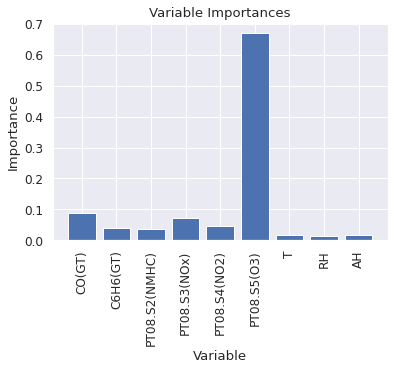

In [35]:
df_values=list(range(len(importances)))
plt.bar(df_values,importances,orientation='vertical')
plt.xticks(df_values,feature_list,rotation='vertical')
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.title('Variable Importances')

In [36]:
import xgboost as xgb

# 建立 XGBRegressor 模型
model=xgb.XGBRegressor()
# 使用訓練資料訓練模型
model.fit(df_train,y_train)
# 使用訓練資料預測
y_pred=model.predict(df_test)
print('model feature importances:',model.feature_importances_) 
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
print('Mean absolute error: %.2f'
      % mean_absolute_error(y_test, y_pred))
print('Mean absolute percentange error: %.2f'
      % mean_absolute_percentage_error(y_test, y_pred))
print('Root Mean squared error: %.2f'
      % sqrt(mean_squared_error(y_test, y_pred)))
print('R squared value: %.2f'%r2_score(y_test, y_pred))

[07:37:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
model feature importances: [0.1717986  0.09481196 0.         0.02904233 0.02724285 0.63494503
 0.01555768 0.01375366 0.01284785]
Mean squared error: 3509.24
Mean absolute error: 43.88
Mean absolute percentange error: 0.04
Root Mean squared error: 59.24
R squared value: 0.92


In [37]:
df_train1=df_train[['CO(GT)','C6H6(GT)','PT08.S3(NOx)','PT08.S4(NO2)','PT08.S5(O3)','T','RH']]
df_test1=df_test[['CO(GT)','C6H6(GT)','PT08.S3(NOx)','PT08.S4(NO2)','PT08.S5(O3)','T','RH']]
model=xgb.XGBRegressor()
model.fit(df_train1,y_train)
# 使用訓練資料預測
y_pred=model.predict(df_test1)
print('model feature importances:',model.feature_importances_) 
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
print('Mean absolute error: %.2f'
      % mean_absolute_error(y_test, y_pred))
print('Mean absolute percentange error: %.2f'
      % mean_absolute_percentage_error(y_test, y_pred))
print('Root Mean squared error: %.2f'
      % sqrt(mean_squared_error(y_test, y_pred)))
print('R squared value: %.2f'%r2_score(y_test, y_pred))

[07:37:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
model feature importances: [0.15769574 0.06744277 0.02659763 0.02315315 0.69872135 0.01441168
 0.01197776]
Mean squared error: 3672.50
Mean absolute error: 44.99
Mean absolute percentange error: 0.04
Root Mean squared error: 60.60
R squared value: 0.91


In [38]:
model = RandomForestRegressor(n_estimators=10,random_state=1,n_jobs=-1)
model.fit(df_train1,y_train)
# 使用訓練資料預測
y_pred=model.predict(df_test1)
print('model feature importances:',model.feature_importances_) 
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
print('Mean absolute error: %.2f'
      % mean_absolute_error(y_test, y_pred))
print('Mean absolute percentange error: %.2f'
      % mean_absolute_percentage_error(y_test, y_pred))
print('Root Mean squared error: %.2f'
      % sqrt(mean_squared_error(y_test, y_pred)))
print('R squared value: %.2f'%r2_score(y_test, y_pred))

model feature importances: [0.08844051 0.07729774 0.07437211 0.05131866 0.6721306  0.02149773
 0.01494265]
Mean squared error: 3177.29
Mean absolute error: 40.83
Mean absolute percentange error: 0.04
Root Mean squared error: 56.37
R squared value: 0.92
